<a href="https://colab.research.google.com/github/junsung6140/Deep_leanring_tutorial/blob/main/Fashion_Mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


## Mnist data 시각화

Text(0.5, 1.0, '9')

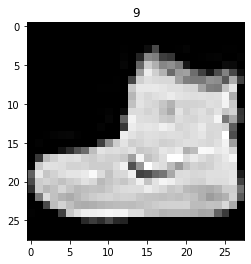

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [ ]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

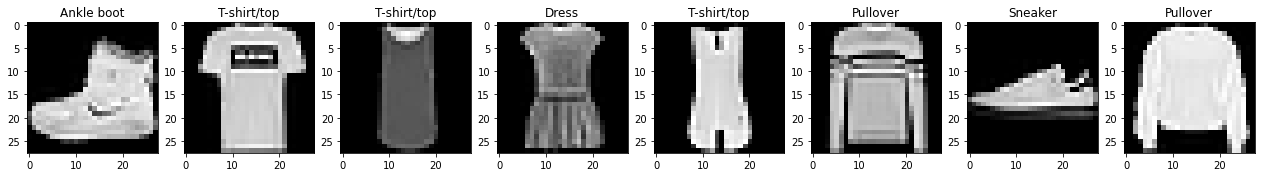

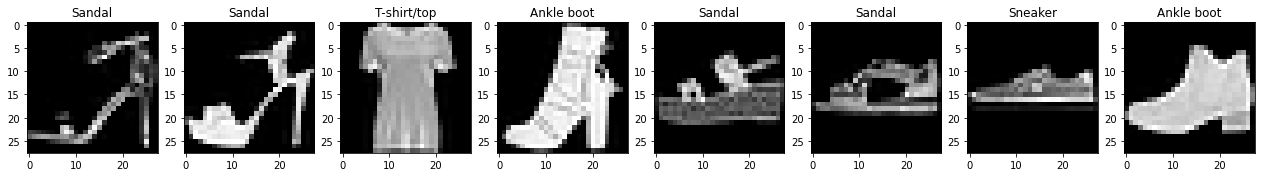

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols) # 1행 ncols열 플랏을 만듬
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

## 데이터 전처리 수행
 * 0 ~ 255 사이의 픽셀값을 0~1 사이 값으로 변환 (보통 큰 값보다 0부터 1 사이 값이 결과가 잘나오는 경우가 많다)
 * array type은 float 32

In [ ]:
import numpy as np

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Dense Layer를 기반으로 모델을 생성

In [ ]:
INPUT_SIZE= train_images.shape[1:]

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=INPUT_SIZE), # 2차원 데이터를 dense로 학습하기 위해 flatten을 해준다 
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 모델의 Loss와 Optimizer 설정하고 학습을 수행
* loss는 categorical_corssentropy로, optimizer는 Adam으로 설정
* cotegorical crossentropy를 위해서 Lable을 One Hot Encoding으로 변경

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)
## batch size는 32, 64 정도의 mini batch가 학습효과가 좋다고 알려져 있다. 
# batch size가 클수를 안정적으로 학습이 된다
# batch size가 작을 수록 필요한 메모리가 감소된다는 장점이 있다.

Epoch 1/20
1875/1875 [==============================] - 4s 1ms/step - loss: 0.6783 - accuracy: 0.7648
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3944 - accuracy: 0.8591
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3452 - accuracy: 0.8739
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3243 - accuracy: 0.8813
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2995 - accuracy: 0.8912
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2858 - accuracy: 0.8941
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.8973
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2627 - accuracy: 0.9019
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2509 - accuracy: 0.9076
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5196114778518677, 0.3817807734012604, 0.34299710392951965, 0.32014837861061096, 0.29956692457199097, 0.2877905070781708, 0.2745477557182312, 0.267900675535202, 0.2554038166999817, 0.24898196756839752, 0.24103209376335144, 0.231770321726799, 0.22677181661128998, 0.22026117146015167, 0.21390795707702637, 0.21116599440574646, 0.2024945318698883, 0.20123253762722015, 0.1948433667421341, 0.1891261786222458]
[0.8171666860580444, 0.8625166416168213, 0.8745499849319458, 0.8828666806221008, 0.8900166749954224, 0.8936833143234253, 0.897849977016449, 0.9002333283424377, 0.9053333401679993, 0.9063500165939331, 0.9085166454315186, 0.9124000072479248, 0.914650022983551, 0.9166666865348816, 0.920283317565918, 0.9202166795730591, 0.9225333333015442, 0.92371666431427, 0.9270333051681519, 0.9291166663169861]


## 테스트 data를 기반으로 Label 예측
- model.predcit()를 이용하여 label 예측
- predict() 인자로 입력되는 feature array는 학습의 feature array와 shape이 동일해야함
- fit() 시 3차원 array로 입력 햇으므로 predict()도 동일한 3차원 데이터 입력
- 특히 한건만 predict() 할때도 3차원 데이터 여야함. 이를 위해 expand_dims()로 2차원 데이터를 3차원으로 변경

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [ ]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted class value:', pred)


softmax output: [[1.3008847e-06 1.5267381e-07 3.3747705e-07 1.8046420e-07 2.2907863e-11
  4.2435044e-05 4.4252263e-07 7.3473468e-02 3.0427222e-07 9.2648137e-01]]
predicted class value: 9


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9.0 predicted class value: 9


## 테스트 데이터 세트로 모델 성능 검증

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size= 64)

157/157 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8782


[0.3899257183074951, 0.8781999945640564]

## 검증 데이터 세트를 이용하여 학습 수행
- 일반적으로 fit()수행시 별도의 검증 데이텉 세트를 이용하여 학습 시 overfitting이 발생하는지 모니터링
- fit()을 수행하면 iteration을반복하기 때문에 중간에 파라미터 변경등의 작업이 어려움
- fit() iteration시 여러 작업을 하기 위해 callback객체를 가짐
- 검증 데이터 세트를 fit()시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아지지 않을 때 callback을 사용하여 learning rate 보정 작업 등을 수행 

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 0.8398 - accuracy: 0.7092 - val_loss: 0.4752 - val_accuracy: 0.8318
Epoch 2/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4366 - accuracy: 0.8464 - val_loss: 0.4421 - val_accuracy: 0.8356
Epoch 3/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3863 - accuracy: 0.8625 - val_loss: 0.3769 - val_accuracy: 0.8640
Epoch 4/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8735 - val_loss: 0.3689 - val_accuracy: 0.8630
Epoch 5/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8824 - val_loss: 0.3661 - val_accuracy: 0.8642
Epoch 6/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3110 - accuracy: 0.8867 - val_loss: 0.3421 - val_accuracy: 0.8797
Epoch 7/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.8897 - val_loss: 0.3414 - val_accuracy: 0.8748
Epoch 

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.5996474027633667, 0.421500563621521, 0.38139522075653076, 0.34918662905693054, 0.32657068967819214, 0.31133267283439636, 0.29819974303245544, 0.2879960834980011, 0.2774640917778015, 0.26677337288856506, 0.2583955228328705, 0.25123709440231323, 0.2439894676208496, 0.2377513349056244, 0.23298989236354828, 0.229081928730011, 0.21931377053260803, 0.2124675214290619, 0.2068682163953781, 0.2035616934299469]
[0.7920588254928589, 0.8519411683082581, 0.8630980253219604, 0.8737254738807678, 0.8830980658531189, 0.8868235349655151, 0.8912549018859863, 0.8931961059570312, 0.8976470828056335, 0.9016470313072205, 0.9043333530426025, 0.9069803953170776, 0.9113725423812866, 0.9126470685005188, 0.9137647151947021, 0.9141764640808105, 0.9200588464736938, 0.9215686321258545, 0.9238039255142212, 0.9246078133583069]
[0.4751672148704529, 0.4420960545539856, 0.37688469886779785, 0.3688538372516632, 0.3661426901817322, 0.3421230614185333, 0.3413703739643097, 0.31895479559898376, 0.3212891221046448, 0.314775

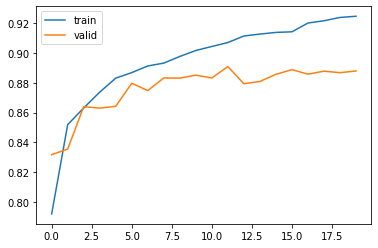

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

## Functional API
- 취미로 할거 아니면 꼭 알아둬야함
- Sequential을 이용하면 쉽게 모델을 만들 수 잇음
- 하지만 keras Framework의 핵심은 Functional API의 핵심이다

In [ ]:
# Sequential Model을 이용하여 Keras 모델 생성 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
## 객체를 만들어준 후 생성자를 만들어 layer를 만듬

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


## Custom 한 Dense Layer 생성하기

In [ ]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    def __init__(self, units= 32):
      super(CustomDense, self).__init__()
      self.units= units

    def build(self, input_shape):
      self.w= self.add_weight(
          shape= (input_shape[-1], self.units),
          initializer= 'random_normal',
          trainable= True,
      )
      self.b= self.add_weight(
          shape= (self.units,), initializer= 'random_normal', trainable= True,
      )

      # CustomDense 객체에 callable로 입력된 입력 데이터 처리
    def call(self, inputs):
      return tf.matmul(inputs, self.w)+ self.b

  # input 값을 4개의 원소를 가지는 1차원 으로 생성
inputs= Input((4,))
  # 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력
outputs= CustomDense(10)(inputs)

  # inputs와 outputs로 model 생성
model= Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
custom_dense_2 (CustomDense) (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


# 함수화

In [ ]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE= 28

def create_model():
  input_tensor = Input(shape= (INPUT_SIZE, INPUT_SIZE))
  x= Flatten()(input_tensor)
  x= Dense(100, activation= 'relu')(x)
  x= Dense(50, activation='relu')(x)
  output= Dense(10, activation= 'softmax')(x)

  model= Model(inputs= input_tensor, outputs= output)
  return model

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 0~1 사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
  # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변경
  images= np.array(images/255.0, dtype=np.float32)
  labels= np.array(labels, dtype= np.float32)

  return images, labels

# 0~1 사이값 float32 변경하는 함수 호출 한 뒤 ohe 적용
def get_preprocessed_ohe(images, labels):
  images, labels= get_preprocessed_data(images, labels)
  # one hot encoding 적용
  oh_labels= to_categorical(labels)
  return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습 수행. 
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))

Epoch 1/20
399/399 [==============================] - 1s 3ms/step - loss: 0.8234 - accuracy: 0.7139 - val_loss: 0.4733 - val_accuracy: 0.8370
Epoch 2/20
399/399 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8531 - val_loss: 0.4211 - val_accuracy: 0.8506
Epoch 3/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3765 - accuracy: 0.8657 - val_loss: 0.4009 - val_accuracy: 0.8552
Epoch 4/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8776 - val_loss: 0.3484 - val_accuracy: 0.8740
Epoch 5/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8821 - val_loss: 0.3400 - val_accuracy: 0.8763
Epoch 6/20
399/399 [==============================] - 1s 2ms/step - loss: 0.3028 - accuracy: 0.8898 - val_loss: 0.3285 - val_accuracy: 0.8813
Epoch 7/20
399/399 [==============================] - 1s 2ms/step - loss: 0.2881 - accuracy: 0.8936 - val_loss: 0.3293 - val_accuracy: 0.8768
Epoch 

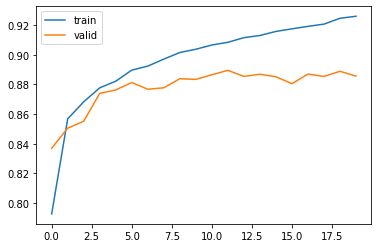

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)